# **Introduction**

I will investigate potential factors that lead to employee attrition using the “[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)” dataset. According to [Indeed](https://https://www.indeed.com/hire/c/info/employee-attrition), companies should track employee attrition and seek to understand potential drivers of attrition because attrition directly impacts the overall operational efficiency of the company. High attrition results in open positions, gaps in critical knowledge and skill sets, and unfulfilled work.  These deficits lead to increased burden and workload on existing/current employees, which likely result in employee burnout and increased attrition. Ultimately, high attrition impairs the company’s abilities to remain viable, grow, and meet its goals.

Relevant stakeholders that would benefit greatly from this research include employees in leadership positions, management roles, and those within the HR department; specifically, the employees and departments who have the power to establish workplace culture and implement employee retention strategies. These stakeholders, according to the [Academy to Innovate HR](https://www.aihr.com/blog/employee-attrition/), can use “data-driven approaches” to “help companies determine what’s causing employees to leave…Then, they can target those issues and really work to keep people around.” Relevant stakeholders at Experian used such data-driven approaches and predictive modeling to “analyze employee data and detect workforce issues;” consequently, benefits valued the most by employees were incorporated into their employee retention strategies.

This dataset provides a variety of information for both current and former employees, including education level, job satisfaction, distance from work, department, and score for work-life balance. Although this is a fictional dataset based on IBM, a reality across many industries is that innovation is the lifeblood of any successful company. Research and Development (R&D) is the heart of innovation, so both the health and retention of its employees are absolutely critical to the timely accomplishment of the company’s goals. In order to quantify and better understand employee attrition, I will address the following questions:

*    What is the size of the company and each of its departments?
*    What is the overall attrition rate and attrition rate for each department?
*    What is the relationship between work-life balance and department for both current employees and former employees?
*    Is there a statistically significant difference in the score given for work-life balance between current employees and former employees?

Knowing the size of the department is important, as size positively correlates with investment of resources and capital. Knowing the attrition rates is imperative, as [an attrition rate exceeding 10% could be problematic for the company](https://https://www.indeed.com/hire/c/info/employee-attrition). I will examine the relevant data for all three departments provided in the dataset (HR, R&D, and Sales) to see if work-life balance was a contributing factor in the department’s attrition rate. A significant difference in the work-life balance score given by employees that left versus employees that stayed is valuable insight and actionable information. Such a significant difference suggests that improving the work-life balance of employees could improve employee retention, reduce employee attrition, and maintain the company’s abilities to continue driving business forward.

Analysis of data from all three departments will be provided because all attrition rates– for the company overall and by each department–should be known. However, I will focus on R&D, as it is often the largest and typically the department responsible for creating and developing the company’s products.

# **Hypotheses**

**H₀**: There is *no statistically significant difference* between the average work-life balance score between former R&D and current R&D employees.

**Hₐ**: There is *a statistically significant difference* between the average work-life balance score between former R&D and current R&D employees.

# **Data**

This Kaggle dataset contains 1,470 records and 35 variables. The data are clean (i.e., no missing values, no null values) and composed mainly of integers. The data does not appear to be longitudinal: the number of employees provided in the data appear to be from one unspecified point in time.

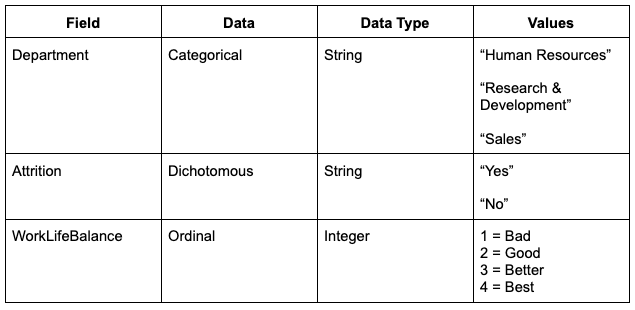



# **Methods**

Initial groups will be formed based on attrition and the overall attrition rate will be calculated where (“yes” attrition / “no” attrition) x 100 = rate of attrition (%). The “yes” and “no” attrition groups will be defined further by department (HR, R&D, or Sales), and the rate of attrition per department will be calculated. The data from the departmental “yes” and “no” attrition groups will then be analyzed as follows to determine statistical significance (if any) and if the null hypothesis can be rejected:

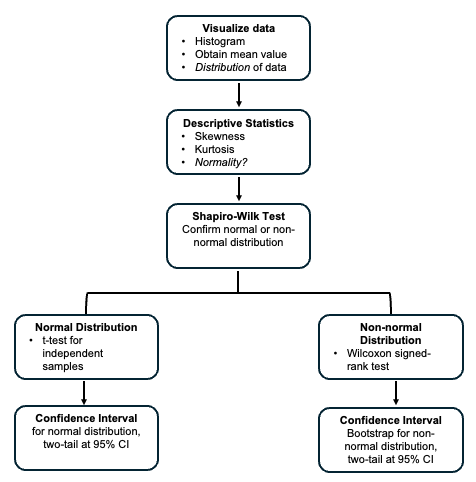

In [ ]:
# Establish the environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Open .csv downloaded from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
# Convert column headers to lower case for ease of coding

df.columns = df.columns.str.lower()

# Get info about the DataFrame
print(df.shape)
df.info()
df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel     

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Establish the groups

yes_att = df[(df['attrition'] == 'Yes')]
no_att = df[(df['attrition'] == 'No')]

# How large is each group? What is the rate of attrition?

print('Attrition: ', len(yes_att))
print('Current: ', len(no_att))

# What is the rate of attriiton?

from decimal import *
getcontext().prec = 2
print('Rate of Attrition: ', round(len(yes_att)/len(no_att), 2)*100,'%')

Attrition:  237
Current:  1233
Rate of Attrition:  19.0 %


In [ ]:
# Count yes-attrition records by Department

print(yes_att['department'].groupby(yes_att['department']).agg(['count']))

                        count
department                   
Human Resources            12
Research & Development    133
Sales                      92


In [ ]:
# Count no-attrition/current employees by Department

print(no_att['department'].groupby(no_att['department']).agg(['count']))

                        count
department                   
Human Resources            51
Research & Development    828
Sales                     354


In [ ]:
# Establish attrition and current employees for all three departments

att_hr = yes_att[(yes_att['department'] == 'Human Resources')]
curr_hr = no_att[(no_att['department'] == 'Human Resources')]

att_rd = yes_att[(yes_att['department'] == 'Research & Development')]
curr_rd = no_att[(no_att['department'] == 'Research & Development')]

att_sales = yes_att[(yes_att['department'] == 'Sales')]
curr_sales = no_att[(no_att['department'] == 'Sales')]


# What is the rate of attriiton for all three departments

getcontext().prec = 2
print('Rate of Attrition for Human Resources: ', round(len(att_hr)/len(curr_hr), 2)*100,'%')
print('Rate of Attrition for Research & Development: ', round(len(att_rd)/len(curr_rd), 2)*100,'%')
print('Rate of Attrition for Sales: ', round(len(att_sales)/len(curr_sales), 2)*100,'%')

Rate of Attrition for Human Resources:  24.0 %
Rate of Attrition for Research & Development:  16.0 %
Rate of Attrition for Sales:  26.0 %


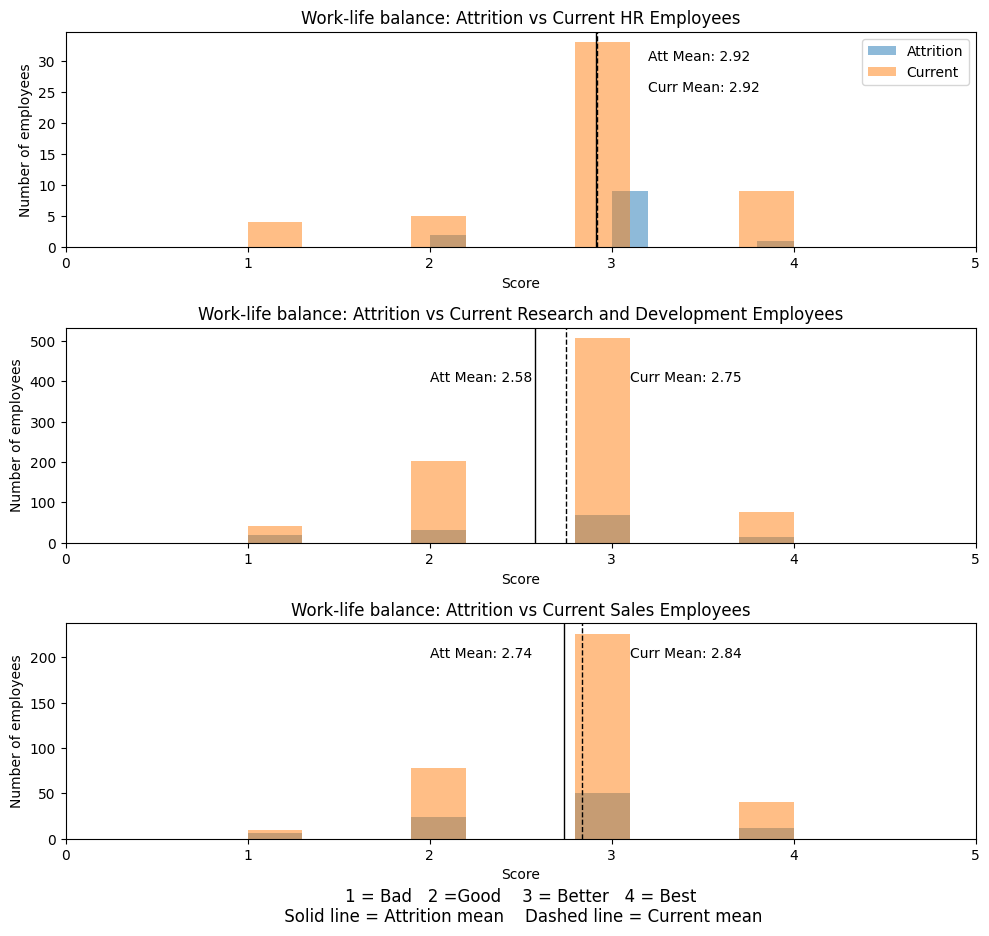

In [ ]:
# Visualize work-life balance between the departmental attrition and control groups
# Use subplots

fig, axes = plt.subplots(nrows=3, ncols=1)
p1 = att_hr['worklifebalance'].plot(kind = 'hist', ax = axes[0], figsize = (10, 10), xticks = range(0,6), ylabel = 'Number of Employees', alpha = .5, label = 'Attrition',
                                    legend = 'upper right')
p1 = curr_hr['worklifebalance'].plot(kind = 'hist', ax = axes[0], figsize = (10, 10), xticks = range(0,6), alpha = .5, label = 'Current', legend = 'upper right')
axes[0].set_title('Work-life balance: Attrition vs Current HR Employees')
axes[0].set(xlabel = 'Score', ylabel = 'Number of employees')
axes[0].axvline(att_hr['worklifebalance'].mean(), color='k', linestyle='solid', linewidth=1)
axes[0].axvline(curr_hr['worklifebalance'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0].text(3.2, 30, 'Att Mean: {}'.format(round(att_hr['worklifebalance'].mean(), 2)))
axes[0].text(3.2, 25, 'Curr Mean: {}'.format(round(curr_hr['worklifebalance'].mean(), 2)))

p2 = att_rd['worklifebalance'].plot(kind = 'hist', ax = axes[1], figsize = (10, 10), xticks = range(0,6), ylabel = 'Number of Employees', alpha = .5, label = 'Attrition')
p2 = curr_rd['worklifebalance'].plot(kind = 'hist', ax = axes[1], figsize = (10, 10), xticks = range(0,6), alpha = .5, label = 'Current')
axes[1].set_title('Work-life balance: Attrition vs Current Research and Development Employees')
axes[1].set(xlabel = 'Score', ylabel = 'Number of employees')
axes[1].axvline(att_rd['worklifebalance'].mean(), color='k', linestyle='solid', linewidth=1)
axes[1].axvline(curr_rd['worklifebalance'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1].text(2, 400, 'Att Mean: {}'.format(round(att_rd['worklifebalance'].mean(), 2)))
axes[1].text(3.1, 400, 'Curr Mean: {}'.format(round(curr_rd['worklifebalance'].mean(), 2)))


p3 = att_sales['worklifebalance'].plot(kind = 'hist', ax = axes[2], figsize = (10, 10), xticks = range(0,6), ylabel = 'Number of Employees', alpha = .5, label = 'Attrition')
p3 = curr_sales['worklifebalance'].plot(kind = 'hist', ax = axes[2], figsize = (10, 10), xticks = range(0,6), alpha = .5, label = 'Current')
axes[2].set_title('Work-life balance: Attrition vs Current Sales Employees')
axes[2].set(xlabel = 'Score', ylabel = 'Number of employees')
axes[2].axvline(att_sales['worklifebalance'].mean(), color='k', linestyle='solid', linewidth=1)
axes[2].axvline(curr_sales['worklifebalance'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2].text(2, 200, 'Att Mean: {}'.format(round(att_sales['worklifebalance'].mean(), 2)))
axes[2].text(3.1, 200, 'Curr Mean: {}'.format(round(curr_sales['worklifebalance'].mean(), 2)))

# Insert text box that defines the x-axis ticks/scores
text = p3.text(2.5, -75,
  '1 = Bad   2 =Good    3 = Better   4 = Best\n Solid line = Attrition mean    Dashed line = Current mean', fontsize = 12,
  horizontalalignment='center', verticalalignment ='center', wrap=True )
plt.tight_layout(rect=(0,.05,1,1))

In [ ]:
# Get descriptive statistics to check for normal distribution

print('HR Attritiion: ', stats.describe(att_hr['worklifebalance']))
print('HR Current: ', stats.describe(curr_hr['worklifebalance']))

print('R&D Attritiion: ', stats.describe(att_rd['worklifebalance']))
print('R&D Current: ', stats.describe(curr_rd['worklifebalance']))

print('Sales Attritiion: ', stats.describe(att_sales['worklifebalance']))
print('Sales Current: ', stats.describe(curr_sales['worklifebalance']))

HR Attritiion:  DescribeResult(nobs=12, minmax=(2, 4), mean=2.9166666666666665, variance=0.26515151515151514, skewness=-0.18351920959819118, kurtosis=0.935510204081631)
HR Current:  DescribeResult(nobs=51, minmax=(1, 4), mean=2.9215686274509802, variance=0.5937254901960782, skewness=-0.9267700967279706, kurtosis=1.0693038466169567)
R&D Attritiion:  DescribeResult(nobs=133, minmax=(1, 4), mean=2.5789473684210527, variance=0.7456140350877194, skewness=-0.4222583739527923, kurtosis=-0.5159878749749778)
R&D Current:  DescribeResult(nobs=828, minmax=(1, 4), mean=2.748792270531401, variance=0.47369866054477805, skewness=-0.5404974377889431, kurtosis=0.4423442896973455)
Sales Attritiion:  DescribeResult(nobs=92, minmax=(1, 4), mean=2.739130434782609, variance=0.5905398948877207, skewness=-0.39711146519202506, kurtosis=-0.049643384547709335)
Sales Current:  DescribeResult(nobs=354, minmax=(1, 4), mean=2.8361581920903953, variance=0.42067188425281277, skewness=-0.45179678846434745, kurtosis=0.6

In [ ]:
# Perform Shapiro-wilk test to confirm normal distribution

print('HR Attritiion: ', stats.shapiro(att_hr['worklifebalance']))
print('HR Current: ', stats.shapiro(curr_hr['worklifebalance']))

print('R&D Attritiion: ', stats.shapiro(att_rd['worklifebalance']))
print('R&D Current: ', stats.shapiro(curr_rd['worklifebalance']))

print('Sales Attritiion: ', stats.shapiro(att_sales['worklifebalance']))
print('Sales Current: ', stats.shapiro(curr_sales['worklifebalance']))

HR Attritiion:  ShapiroResult(statistic=0.6986056566238403, pvalue=0.0008170005166903138)
HR Current:  ShapiroResult(statistic=0.7611362338066101, pvalue=1.0072777456571202e-07)
R&D Attritiion:  ShapiroResult(statistic=0.84223473072052, pvalue=1.2737326471334853e-10)
R&D Current:  ShapiroResult(statistic=0.7955342531204224, pvalue=5.3313953832392035e-31)
Sales Attritiion:  ShapiroResult(statistic=0.8381755352020264, pvalue=1.264746529727745e-08)
Sales Current:  ShapiroResult(statistic=0.7831411361694336, pvalue=2.3264169980821555e-21)


In [ ]:
# Is the difference between Attrition and Current groups statitistically significant?

print('HR: ', stats.ttest_ind(att_hr['worklifebalance'], curr_hr['worklifebalance']))
print('R&D: ', stats.ttest_ind(att_rd['worklifebalance'], curr_rd['worklifebalance']))
print('Sales: ', stats.ttest_ind(att_sales['worklifebalance'], curr_sales['worklifebalance']))

HR:  TtestResult(statistic=-0.020898340273471944, pvalue=0.9833949605230763, df=61.0)
R&D:  TtestResult(statistic=-2.543125658526963, pvalue=0.011142678576600343, df=959.0)
Sales:  TtestResult(statistic=-1.2285307522982651, pvalue=0.21989857075107658, df=444.0)


In [ ]:
# Function to return the Confidence Interval (two=tail) at 95%

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(att_rd['worklifebalance'], curr_rd['worklifebalance'])


'The difference in means at the 95% confidence interval (two-tail) is between 0.015785655475064858 and 0.3239041487456322.'

# **Results**

The overall rate of attrition is 19%. R&D is the largest department in the company and  experienced the highest attrition with 133 total employees leaving the department (out of 237 employees total that left the company), which equates to a departmental attrition rate of 16%. However, Sales and HR had higher internal rates of attrition: 24% and 26%, respectively.

Visualization of work-life balance scores from both attrition and current employees within each department showed similar mean scores in the HR department and different mean scores in both the R&D and Sales departments.

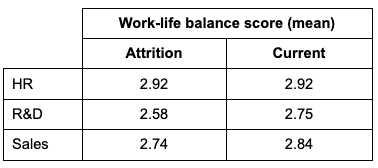

Importantly, the lower mean work-life balance score is from the group of employees who left the company.

The normal distribution of all data was confirmed by the Shapiro-Wilk test statistic and corresponding p-value; generally, the W ranged from 0.70 to 0.84 and the p-values < 0.0008. Subsequently the t-test for independent samples was performed to assess statistical significance of difference between the means of the work-life balance scores between the attrition and current employees within each department. The only department that has a statistically significant difference between mean work-life balance scores is R&D.

The difference between the means of the work-life balance scores between the attrition and current employees is statistically significant in the R&D department: t-statistic = -2.54 ; p-value = 0.01. ***Thus the null hypothesis that “there is no statistically significant difference between the average work-life balance score between former R&D and current R&D employees” can be rejected***. Furthermore, the difference in means at the 95% CI (two-tail) is between 0.015785655475064858 and 0.3239041487456322.




# **Conclusions and Next Steps**

The results of this study show that the company has problematic attrition rates (i.e., attrition rates exceeding 10%) that need to be addressed. Fortunately, this study has provided a more specific target for relevant stakeholders to address and implement improvements. The results showed that R&D attrition accounted for 56.1% of overall company attrition and that the difference in work-life balance scores between former and current employees was statistically significant. While the difference between said scores was 0.32 at most, the difference in means is statistically significant and the mean work-life balance score from former employees is lower. This statistically significant result strongly suggests that efforts to improve work-life balance amongst R&D employees would likely improve employee retention.

Given that R&D attrition accounts for over half of the company’s overall attrition and that work-life balance for R&D employees is an area for improvement, follow-up studies to further characterize R&D attrition would be beneficial. For example, understanding when--in relation to the employee’s tenure with the company--attrition is occurring would provide opportunity for the relevant stakeholders to make more precisely targeted improvements to employee retention within R&D. This graph shows the number of years at company for all, both former and current, R&D employees:


<Axes: xlabel='yearsatcompany', ylabel='Count'>

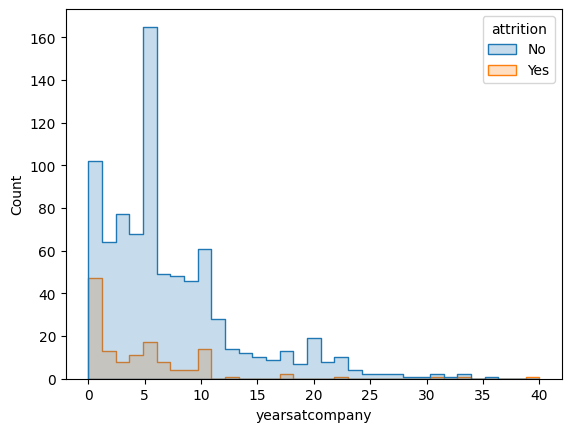

In [ ]:
rd_all = df[(df['department'] == 'Research & Development')]
sns.histplot(rd_all, x = 'yearsatcompany', hue ='attrition', element = 'step')

These data show that the majority of the attrition within R&D occurs within the first year of employment. “[Most companies can expect to pay between 4,000 and 20,000 dollars to hire a new employee, not including salary and benefits](https://https://www.indeed.com/hire/c/info/cost-of-hiring-employees),” according to Indeed. This high attrition rate occurring within the first year of hire equates to roughly 180,000 to 900,000 dollars in immediate failed monetary investment in addition to the continued gaps in critical knowledge and unfulfilled work that will impair operational efficiency. Relevant stakeholders would benefit from using these collective data to make work-life balance improvements and improvements to critical hiring procedures to reduce R&D attrition rates and improve employee retention.